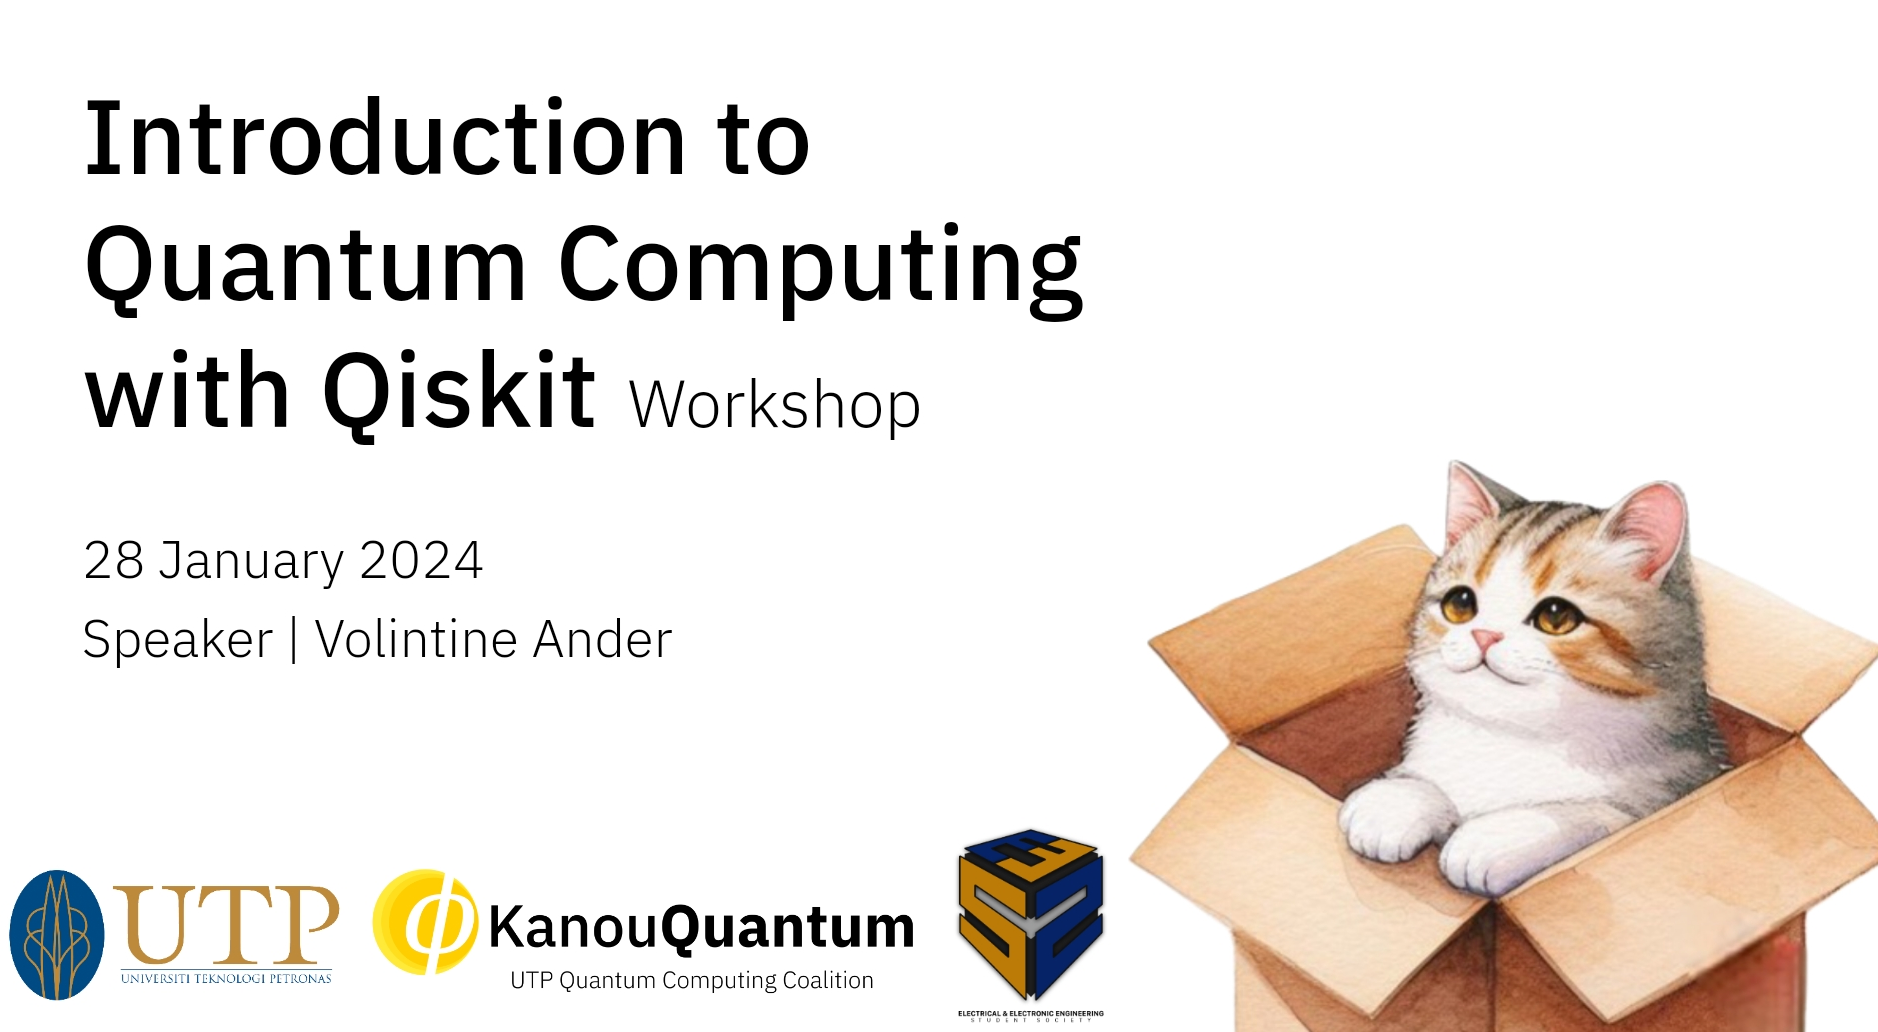

## Introduction to Quantum Computing with Qiskit @ UTP
### Workshop by KanouQuantum × E3S2

Copyright 2024 Volintine Ander

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Exercise 1

## Circuit Registers

Circuit registers come in two flavors: Classical bits and qubits

First import the necessary libraries below:

In [11]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_distribution, plot_bloch_multivector, plot_state_qsphere, array_to_latex
from ibm_quantum_widgets import *
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.result import marginal_distribution
from qiskit.circuit import BreakLoopOp
from qiskit.circuit.library import UGate
from numpy import pi, random

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit import Aer
from qiskit_aer.primitives import Sampler as AerSampler

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")


qiskit_runtime_service.__init__:INFO:2024-02-03 06:02:57,194: Default instance: quantum-explorer/group-6/project-1


Registers help you predefine cbits and qubits for a circuit. You can instantiate a quantum circuit with two quantum and \
classical registers with two bits each as below:

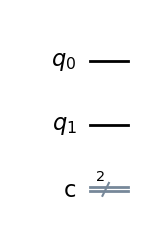

In [211]:
qc = QuantumCircuit(2,2) #Run this cell
qc.draw('mpl')

Note that in a quantum circuit, the number of classical bits is indicated by the number of lines, a slash sign is also added \
to label the number of cbits more clearly.

Alternatively, you can also explicitly define registers as below:

In [212]:
qreg = QuantumRegister(5, 'QReg') #Create quantum register with 5 qubits with label Qreg
creg = ClassicalRegister(5, 'CReg') #Create classical register with 5 cbits with label Creg

You can then use the predefined registers to define a quantum circuit:

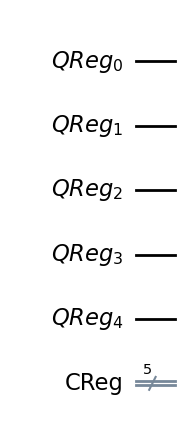

In [213]:
qc_1 = QuantumCircuit(qreg, creg)
qc_1.draw('mpl')

## Challenge

Create a quantum circuit with a 4-qubit quantum register and a single classical bit.

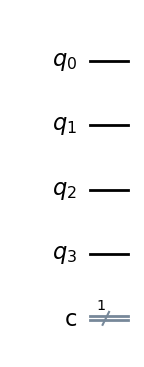

In [240]:
## Add code below
circ = QuantumCircuit(4, 1)
circ.draw('mpl')

# Exercise 2

## Adding gates to a circuit

At the end of this exercise, you should be able to prepare the four Bell states.

The four Bell states (also known as EPR states after Einstein, Podolsky, and Rosen) are the states $\lvert \Phi^{+} \rangle$, $\lvert \Phi^{-} \rangle$, $\lvert \Psi^{+} \rangle$, and $\lvert \Psi^{-} \rangle$.

These states can be realized using two gates:

- Hadamard gate (unary)
- CX (Controlled NOT) gate (binary)

### Prepare $\lvert \Phi^+ \rangle$

We first take a look at what the H (Hadamard) gate does on its own:

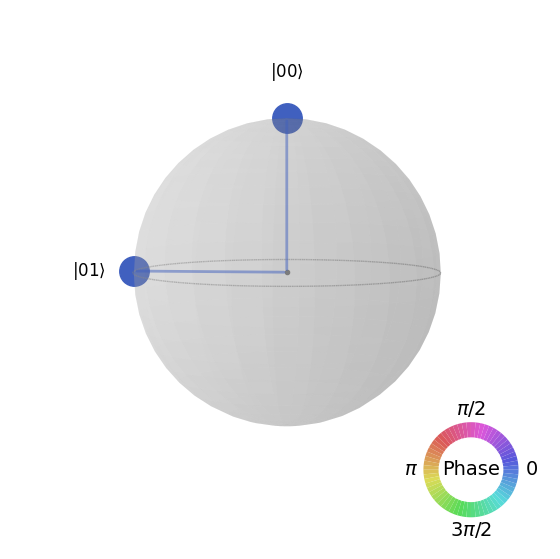

In [214]:
example = QuantumCircuit(2)
example.h(0)
Statevector(example).draw(output='qsphere')

In [215]:
Statevector(example).draw(output='latex')

<IPython.core.display.Latex object>

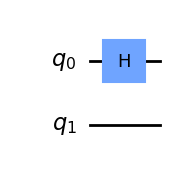

In [216]:
example.draw('mpl')

This state is not that far off from $\lvert \Phi^+ \rangle$, which has the following representation:

$\lvert \Phi^+ \rangle = \frac{1}{\sqrt{2}} ( \lvert 00 \rangle + \lvert 11 \rangle )$

From the expression, you can see that upon measurement, it has a 50-50 chance of collapsing into either the state $\lvert 00 \rangle$ or $\lvert 11 \rangle$. \
We are interested in looking at the latter state $\lvert 11 \rangle$.

This state can only be achieved with the CNOT gate, because having q0 as the control qubit and q1 as the target, \
whenever q0 = 0 then q1 = 0, and whenever q0 = 1 then q1 = 1.

Adding a CNOT gate to the circuit as below will result in the desired state $\lvert \Phi^+ \rangle$:

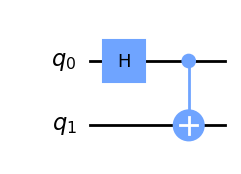

In [217]:
example.cx(0,1)
example.draw('mpl')

To verify, draw the statevector representation as below:

In [218]:
Statevector(example).draw(output='latex')

<IPython.core.display.Latex object>

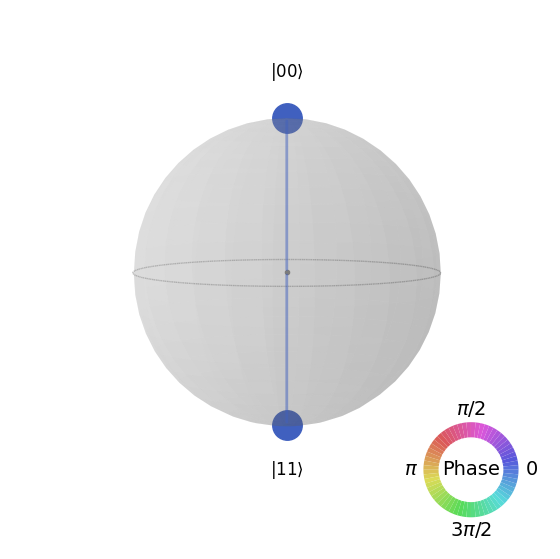

In [219]:
Statevector(example).draw(output='qsphere')

## Challenge
### Prepare the rest of the Bell states, starting with the Hadamard gate

Given:

$\lvert \Phi^- \rangle = \frac{1}{\sqrt{2}} ( \lvert 00 \rangle - \lvert 11 \rangle )$ **Hint 1**: Before the Hadamard gate, rotate q0 $\pi$ rad around the X axis.

$\lvert \Psi^+ \rangle = \frac{1}{\sqrt{2}} ( \lvert 01 \rangle + \lvert 10 \rangle )$ **Hint 2**: Before the Hadamard gate, rotate q1 $\pi$ rad around the X axis.

$\lvert \Psi^- \rangle = \frac{1}{\sqrt{2}} ( \lvert 01 \rangle - \lvert 10 \rangle )$ **Hint 3**: Follow **Hint 2**. Then after the H gate, rotate both q0 and q1 $\pi$ rad around the Z axis.


In [238]:
#Insert code here
phi_minus = QuantumCircuit(2)
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)

psi_plus = QuantumCircuit(2)
psi_plus.x(1)
psi_plus.h(0)
psi_plus.cx(0,1)

psi_minus = QuantumCircuit(2)
psi_minus.x(1)
psi_minus.h(0)
psi_minus.z(0)
psi_minus.z(1)
psi_minus.cx(0,1)

# Exercise 3
## Quantum teleportation

After being briefed on the protocol, you will now look at how the protocol is implemented in Qiskit.

First, we define the registers needed for our circuit:

In [3]:
alice_bob_qubits = QuantumRegister(2, "Alice_Bob_Qubits") # Alice and Bob qubits (qubits A and B)
teleport = QuantumRegister(1, "Q_qubit") # Qubit to be teleported by Alice
cbits = ClassicalRegister(2, "a_b_cbits") #Classical qubits a and b

Run the cell below to define the teleportation circuit:

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


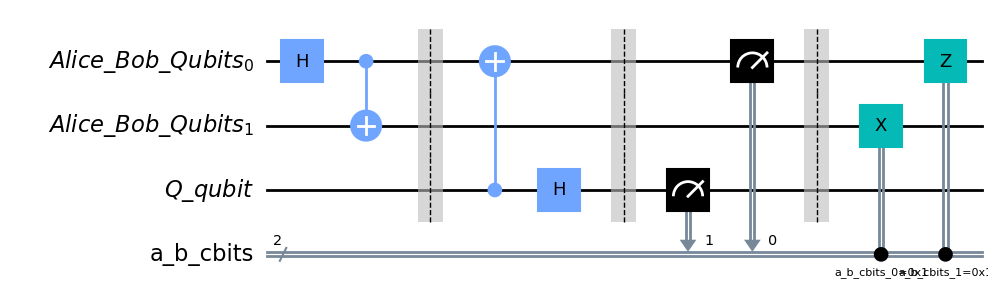

In [4]:
qc = QuantumCircuit(alice_bob_qubits, teleport, cbits)

#Entangle Alice and Bob qubits
qc.h(alice_bob_qubits[0])
qc.cx(alice_bob_qubits[0], alice_bob_qubits[1])
qc.barrier()

#Prepare the qubit to be teleported (Q)
qc.cx(teleport, alice_bob_qubits[0])
qc.h(teleport)
qc.barrier()

#Alice measures Q on b, and A on a
qc.measure(teleport, cbits[1]) #Control bit for Z gate
qc.measure(alice_bob_qubits[0], cbits[0]) #Control bit for X gate
qc.barrier()

#Bob processes B based on the values of a, b
qc.x(alice_bob_qubits[1]).c_if(cbits[0], 1)
qc.z(alice_bob_qubits[0]).c_if(cbits[1], 1)

display(qc.draw())

Use the AerSampler primitive to look at the results of the measured qubits:

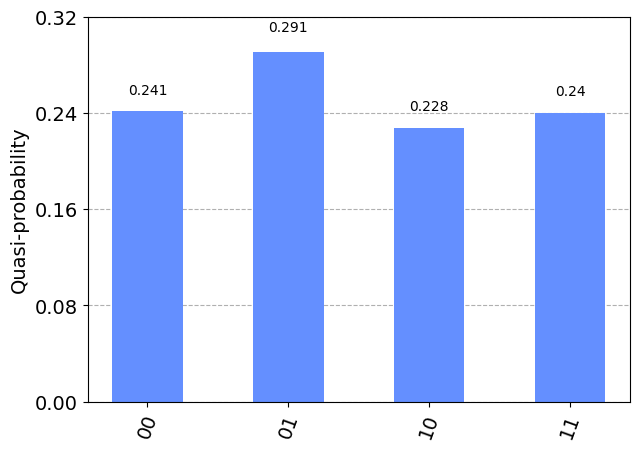

In [12]:
result = AerSampler().run(qc).result()
quasi_dists = result.quasi_dists[0].binary_probabilities()
plot_distribution(quasi_dists)

# Running on real and simulated backends

Backends refer to non-client machines that run your Qiskit code. Backends can either be fake or real. Fake backends are classical computers that run simulations of your code. Real backends are real quantum computers.

Everyone is given 10 minutes of shared time on a select number of IBM quantum computers. Use this wisely. It's recommended that you first test out your code on a fake backend.

Run this cell to fetch the list of fake backends. This may take some time:

In [13]:
service = QiskitRuntimeService(channel = "ibm_quantum")
backend_list = service.backends(simulator = True)

qiskit_runtime_service.__init__:INFO:2024-02-03 06:15:13,280: Default instance: quantum-explorer/group-6/project-1


In [18]:
find_least_busy = service.least_busy(simulator = False)
print(find_least_busy)

<IBMBackend('ibm_kyoto')>


Print out the available simulators:

In [14]:
print({backend.name for backend in backend_list})

{'simulator_mps', 'simulator_extended_stabilizer', 'simulator_statevector', 'ibmq_qasm_simulator', 'simulator_stabilizer'}


Pick a simulator you want to use:

In [15]:
backend = "simulator_statevector"

Now you can run your code on the selected backend. This may take some time:

base_primitive._run_primitive:INFO:2024-02-03 06:16:04,685: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'job_tags': []}, 'simulator': {}}
qiskit_runtime_service.run:INFO:2024-02-03 06:16:04,687: Instance selected: ibm-q/open/main


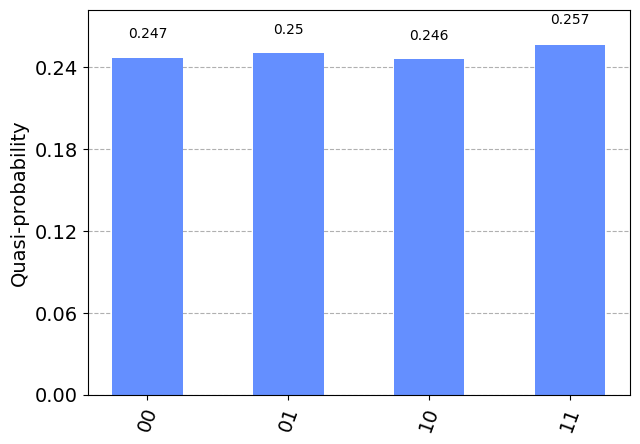

In [16]:
with Session(service=service, backend=backend) as session:
    sampler = Sampler()
    result = sampler.run(qc).result()
    quasi_dists = result.quasi_dists[0].binary_probabilities(2)

display(plot_distribution(quasi_dists))

# Testing the protocol

One of the postulates of quantum mechanics is that all time evolution is unitary, since time evolution operators are always described using a unitary operator. What this means is a qubit that has been acted upon by an operator can be reversed back to its initial state, by applying the conjugate transpose of the operator.

$$U \lvert \psi \rangle \rightarrow \lvert \psi^\prime \rangle$$
$$U^\dagger U = I \Leftrightarrow \lvert \psi \rangle = U^\dagger \lvert \psi^\prime \rangle$$

We first need a random unitary gate that initializes Q to a random state.

In [228]:
def random_param(): return random.random()*2*pi

randomizer = UGate(random_param(), random_param(), random_param(), "Q initial state")

display(array_to_latex(randomizer.to_matrix()))

<IPython.core.display.Latex object>

We then create a circuit using the same registers we previously defined for the teleportation circuit. This circuit will first apply the randomizer gate to Q, and is then appended with the teleportation circuit, and finally Bob's qubit B is inverted to reverse the randomizer gate and then measured.

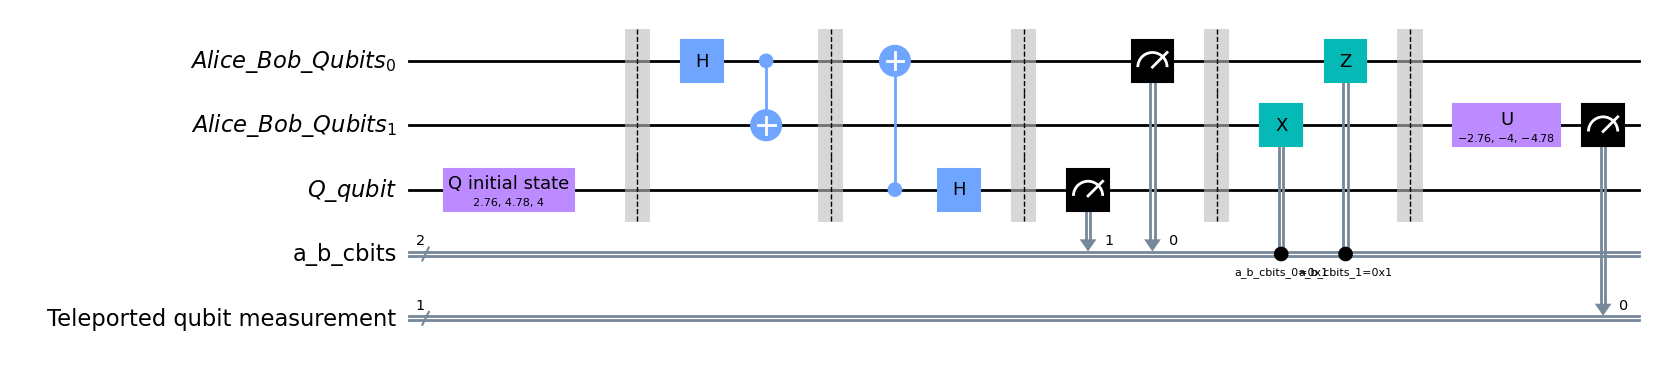

In [229]:
test = ClassicalRegister(1, "Teleported qubit measurement")
qc_2 = QuantumCircuit(alice_bob_qubits, teleport, cbits, test)

#Append the state randomizer on Q
qc_2.append(randomizer, teleport)
qc_2.barrier()

#Append the previous circuit
qc_2 = qc_2.compose(qc)
qc_2.barrier()

#Apply the inverted randomizer to B and measure.
qc_2.append(randomizer.inverse(), [alice_bob_qubits[1]])

#Measure qubit B on test cbit
qc_2.measure(alice_bob_qubits[1], test)

display(qc_2.draw())

Run the cell below to submit the circuit to your selected backend:

base_primitive._run_primitive:INFO:2024-01-19 16:34:14,251: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


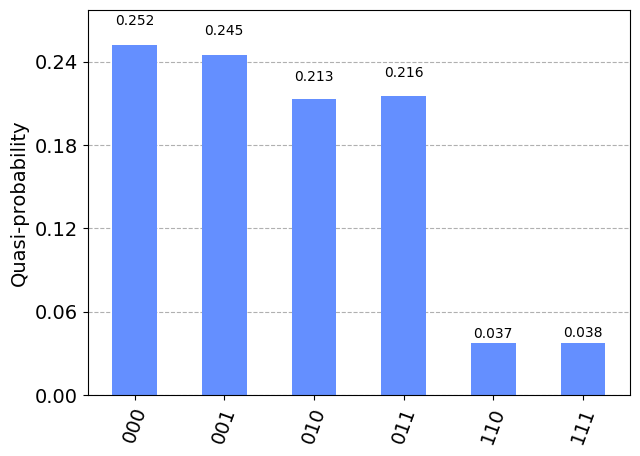

In [230]:
with Session(service=service, backend=backend) as session:
    sampler = Sampler()
    result = sampler.run(qc_2).result()
    quasi_dists = result.quasi_dists[0].binary_probabilities(3)

plot_distribution(quasi_dists)

This result isn't very useful to us right now, since it includes Bob's cbits $\lvert ab \rangle$. We want to look at the Teleported qubit measurement distribution instead.

### (Optional)
The code below lists out the keys in the quasi-distribution as padded 3-digit binary integers, if you haven't converted the ```QuasiDistribution``` using the ```binary_probabilities()``` method.

In [ ]:
keylist = list(quasi_dists.keys())

for i in range(len(keylist)):
    print(f'{keylist[i]:03b}')

### Marginalize your results

We wish to view the distribution on the test cbit only. This process of filtering for the information you want is called *marginalization*.

In [231]:
def marginalize(result):
    sarak = []
    for dist in result.quasi_dists:
        sarak.append({'0': 0, '1': 0})
        for k, v in dist.items():
            # Check the teleported qubit measurement value 
            if f"{k:03b}"[0] == '0':
                sarak[-1]['0'] += v
            else:
                sarak[-1]['1'] += v

    return sarak


Now call the function and plot the marginalized distribution:

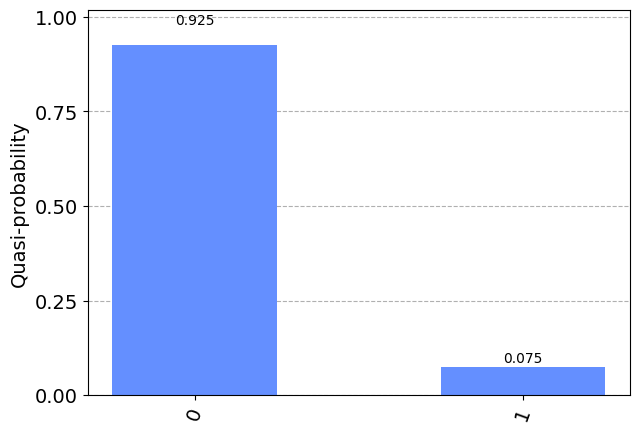

In [232]:
plot_distribution(marginalize(result))

## Interpreting the result

The ideal distribution would be 100% $\lvert 0 \rangle$ and 0% $\lvert 1 \rangle$. This is because, with certainty, the qubit Q was initally at the state $\lvert 0 \rangle$ before being randomized to some state $\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle$. When this randomization is reversed, we should expect Q to be at the state $\lvert 0 \rangle$.

### Qiskit version information

In [209]:
import qiskit.tools.jupyter
%qiskit_version_table

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
